<a href="https://colab.research.google.com/github/Yakuub-Adam/Meta-Data-Analytics-Project/blob/main/Meta_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Meta Next Step Data.xlsx to Meta Next Step Data.xlsx


In [ ]:
import pandas as pd


df = pd.read_excel('Meta Next Step Data.xlsx', sheet_name='next_step_data')

df.head()


,USER_ID,GENDER,AGE,CITY,AD_FORMAT,AD_COST_GBP,DATE,AD_IMPRESSION,AD_CLICK,LIKE,COMMENT,WEBSITE_VISIT,PURCHASE_SHOE,PURCHASE_OTHER,TOTAL_SPEND_GBP
0,ID1234,GENDER_MALE,AGE_25_TO_34,Bournemouth,video_athlete_product,0.010728,2024-05-10,1,0,0,0,0,0,0,0
1,ID1235,GENDER_FEMALE,AGE_25_TO_34,King's Lynn,video_athlete_product,0.010728,2024-05-10,1,0,0,0,1,0,0,0
2,ID1236,GENDER_MALE,AGE_35_TO_49,London,video_athlete_product,0.010728,2024-05-10,1,0,0,0,0,0,0,0
3,ID1237,GENDER_MALE,AGE_35_TO_49,Grimsby,video_athlete_product,0.010728,2024-05-08,1,0,0,0,0,0,0,0
4,ID1238,GENDER_MALE,AGE_35_TO_49,Thornton-Cleveleys,video_athlete_product,0.010728,2024-05-11,1,0,1,0,0,0,0,0


In [ ]:

ad_group = df.groupby('AD_FORMAT')


total_impressions = ad_group['AD_IMPRESSION'].sum()
total_clicks = ad_group['AD_CLICK'].sum()
total_likes = ad_group['LIKE'].sum()
total_comments = ad_group['COMMENT'].sum()
total_engagement = total_clicks + total_likes + total_comments
total_purchases = ad_group['PURCHASE_SHOE'].sum() + ad_group['PURCHASE_OTHER'].sum()
total_ad_cost = ad_group['AD_COST_GBP'].sum()


ctr = (total_clicks / total_impressions) * 100
er = (total_engagement / total_impressions) * 100
cvr = (total_purchases / ad_group['USER_ID'].count()) * 100
cpm = (total_ad_cost / total_impressions) * 1000
cpc = total_ad_cost / total_clicks
cpa = total_ad_cost / total_purchases


metrics_df = pd.DataFrame({
    'Total Impressions': total_impressions,
    'Total Clicks': total_clicks,
    'Total Engagement': total_engagement,
    'Total Purchases': total_purchases,
    'CTR (%)': ctr,
    'ER (%)': er,
    'CVR (%)': cvr,
    'CPM (£)': cpm,
    'CPC (£)': cpc,
    'CPA (£)': cpa
})

metrics_df.reset_index(inplace=True)


metrics_df


,AD_FORMAT,Total Impressions,Total Clicks,Total Engagement,Total Purchases,CTR (%),ER (%),CVR (%),CPM (£),CPC (£),CPA (£)
0,static_athlete_product,287,67,77,13,23.344948,26.829268,4.529617,21.304884,0.091261,0.470346
1,static_product,285,46,53,4,16.140351,18.596491,1.403509,15.170144,0.093989,1.080873
2,video_athlete_product,428,19,125,21,4.439252,29.205607,4.906542,19.124467,0.430804,0.389775


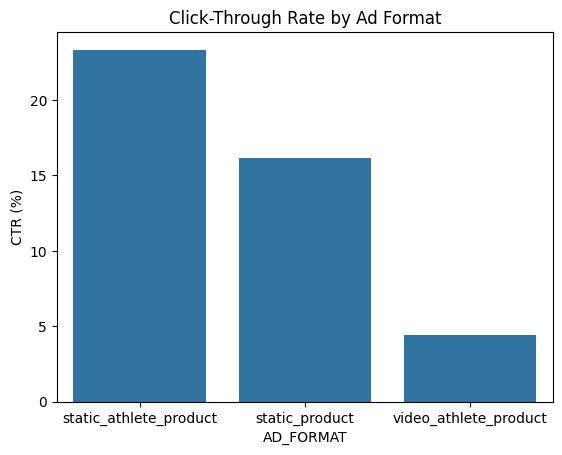

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x='AD_FORMAT', y='CTR (%)', data=metrics_df)
plt.title('Click-Through Rate by Ad Format')
plt.show()


In [ ]:
metrics_df.to_csv('ad_performance_metrics.csv', index=False)



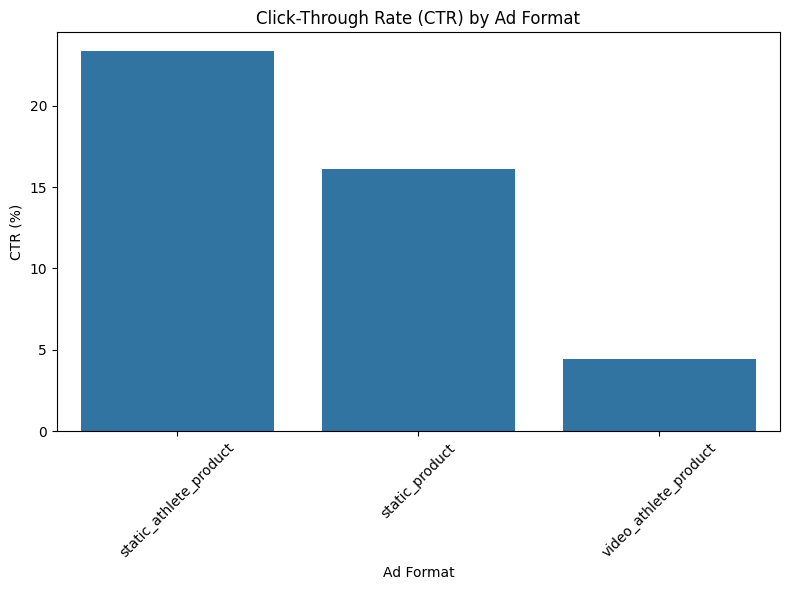

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.barplot(x='AD_FORMAT', y='CTR (%)', data=metrics_df)
plt.title('Click-Through Rate (CTR) by Ad Format')
plt.ylabel('CTR (%)')
plt.xlabel('Ad Format')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


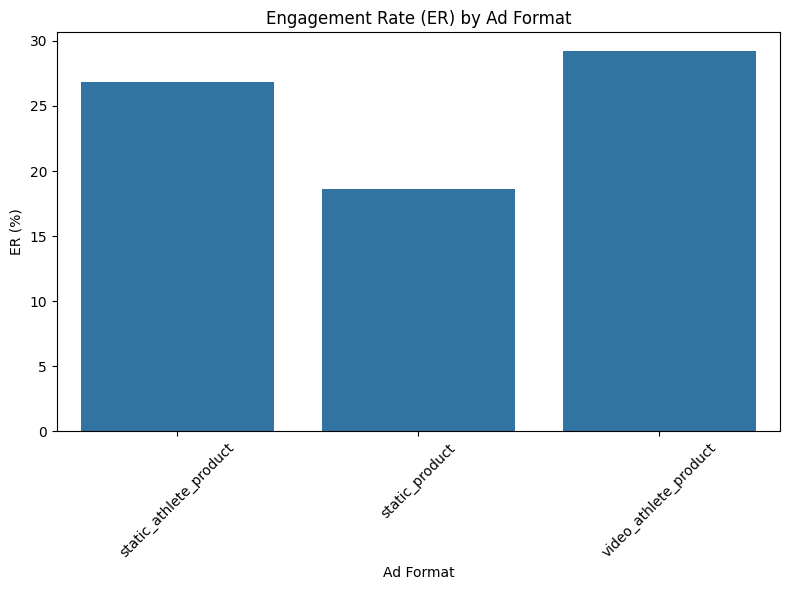

In [ ]:

plt.figure(figsize=(8, 6))
sns.barplot(x='AD_FORMAT', y='ER (%)', data=metrics_df)
plt.title('Engagement Rate (ER) by Ad Format')
plt.ylabel('ER (%)')
plt.xlabel('Ad Format')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


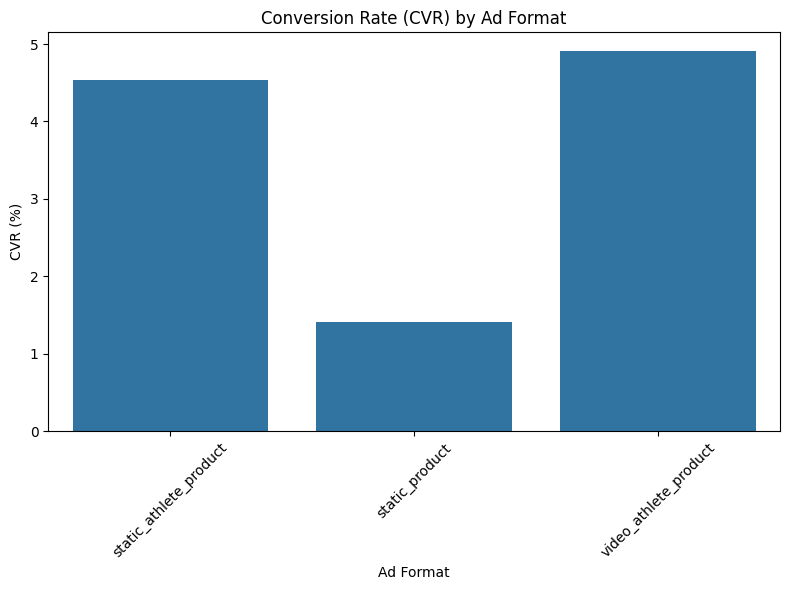

In [ ]:

plt.figure(figsize=(8, 6))
sns.barplot(x='AD_FORMAT', y='CVR (%)', data=metrics_df)
plt.title('Conversion Rate (CVR) by Ad Format')
plt.ylabel('CVR (%)')
plt.xlabel('Ad Format')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 12.8 MB/s eta 0:00:00


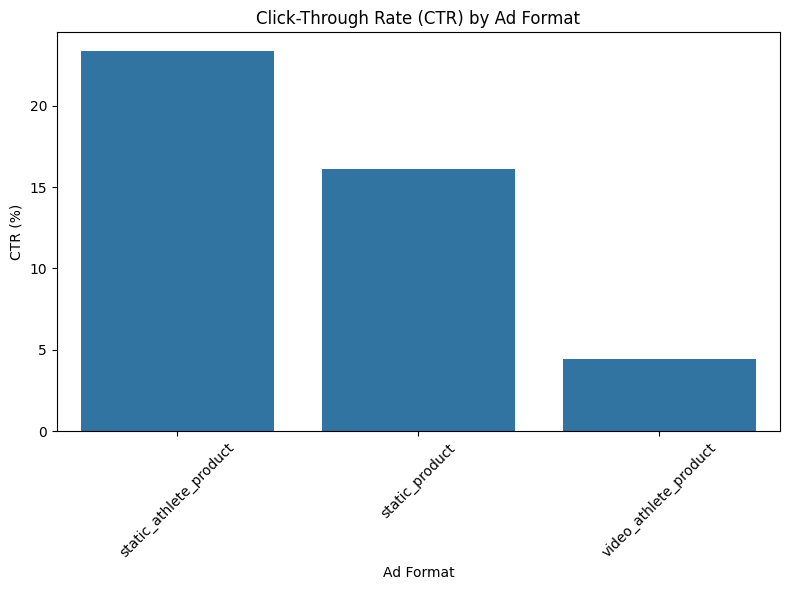

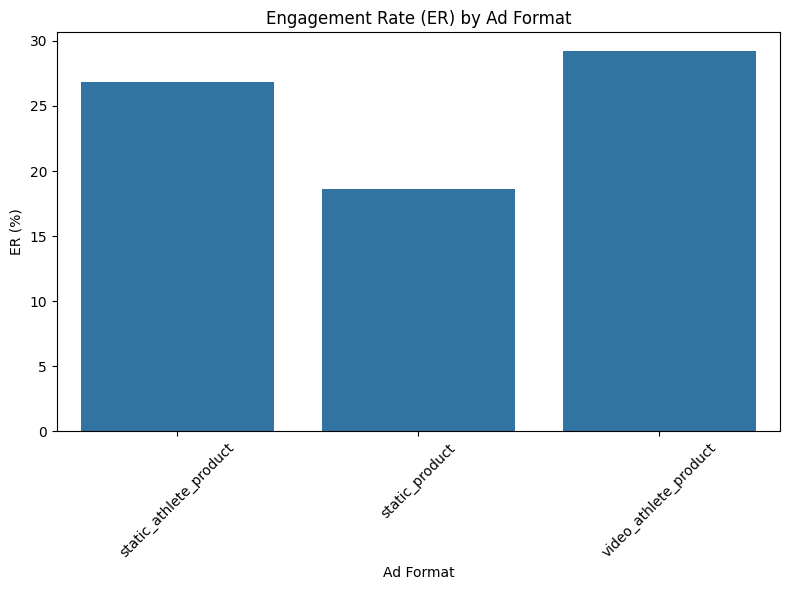

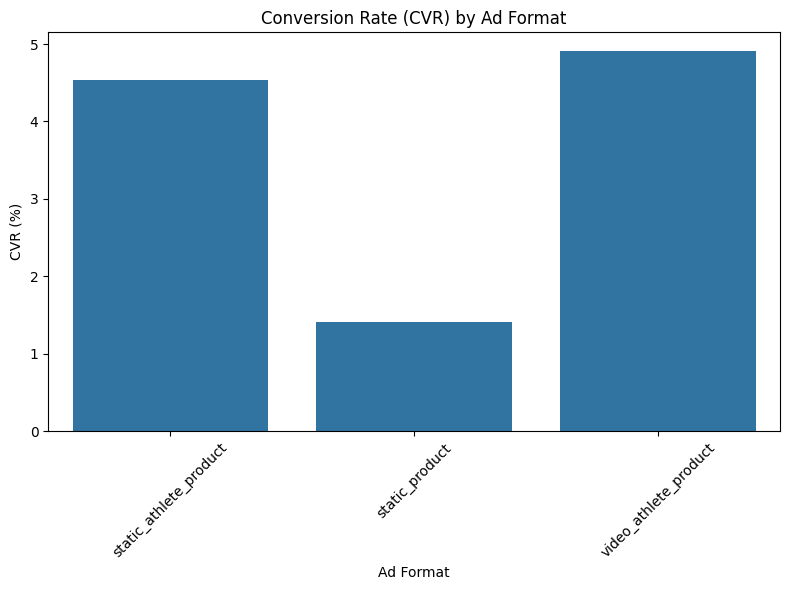

In [ ]:
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt


prs = Presentation()

slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
title.text = "Athlemax Ad Format Analysis"
subtitle = slide_1.placeholders[1]
subtitle.text = "Campaign Performance Summary"


slide_2 = prs.slides.add_slide(prs.slide_layouts[5])
title_2 = slide_2.shapes.title
title_2.text = "Click-Through Rate (CTR) by Ad Format"


plt.figure(figsize=(8, 6))
sns.barplot(x='AD_FORMAT', y='CTR (%)', data=metrics_df)
plt.title('Click-Through Rate (CTR) by Ad Format')
plt.ylabel('CTR (%)')
plt.xlabel('Ad Format')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ctr_plot.png")


img_path = "ctr_plot.png"
slide_2.shapes.add_picture(img_path, Inches(0.5), Inches(1.5), width=Inches(8))


slide_3 = prs.slides.add_slide(prs.slide_layouts[5])
title_3 = slide_3.shapes.title
title_3.text = "Engagement Rate (ER) by Ad Format"


plt.figure(figsize=(8, 6))
sns.barplot(x='AD_FORMAT', y='ER (%)', data=metrics_df)
plt.title('Engagement Rate (ER) by Ad Format')
plt.ylabel('ER (%)')
plt.xlabel('Ad Format')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("er_plot.png")


img_path = "er_plot.png"
slide_3.shapes.add_picture(img_path, Inches(0.5), Inches(1.5), width=Inches(8))

slide_4 = prs.slides.add_slide(prs.slide_layouts[5])
title_4 = slide_4.shapes.title
title_4.text = "Conversion Rate (CVR) by Ad Format"

plt.figure(figsize=(8, 6))
sns.barplot(x='AD_FORMAT', y='CVR (%)', data=metrics_df)
plt.title('Conversion Rate (CVR) by Ad Format')
plt.ylabel('CVR (%)')
plt.xlabel('Ad Format')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cvr_plot.png")


img_path = "cvr_plot.png"
slide_4.shapes.add_picture(img_path, Inches(0.5), Inches(1.5), width=Inches(8))


prs.save('Ad_Performance_Analysis.pptx')
